<a href="https://colab.research.google.com/github/carolgil/nfl-betting/blob/master/NFLbetting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caroline Gilhool
# 2019-2020 NFL Season Data Manipulation & Betting Predictions

## Introduction

I will be analyzing 2019-2020 NFL Data in order to compare teams' performance as well as determine whether certain factors, such as game location (home vs away), stadium roof type (fixed, open, or retractable),  etc. impacts a team's performance. After collecting this data, I will merge it with NFL betting odds data for the upcoming week's games in order to predictively model the best bets against the spread and over/under lines.

## Dimension 1: Data Gathering

I create the following dataframes:
* **stadiums** : I use pandas to read NFL stadium data from Wikipedia into a table. I will use this data to later determine if games were played under fixed, open, or retractable roofs and whether that impacts NFL game results.
* **result**: I do a get request to cbssports.com and use BeautifulSoup to scrape all the NFL team names as well as the URLs to their game results. I then loop through a list of the urls and use pandas to read the game results into an individual table for each team. I then concatenate these tables using the concat function and set the index to be the team name.
* **upcoming_week** : I use pandas to read the current week's upcoming NFL games from CBS. I put games that have yet to happen into a dataframe. For example, if it is a Wednesday the table will contain the upcoming Thursday night, Sunday, and Monday night games. However, if it is a Monday morning, the table will only contain the Monday night game that has not yet occurred.

        NOTE: CBS link must be updated to include the current NFL week. EX: This week (12/10/19) is WEEK 15.
        Therefore, the link I am using is https://www.cbssports.com/nfl/schedule/2019/regular/15/ with 15
        included at the end of this URL. From 12/17-12/23, the link should 
        be https://www.cbssports.com/nfl/schedule/2019/regular/16/.
        
* **bets**: I use pandas to read betting odds data for the week from Odds Shark. I collect of all of the teams favored to win, the spread, spread price, O/U, and O/U price into a dataframe called bets that I later merge with result by matching based on if the "Team Favored To Win" in bets is equal to the 'Home' or 'Away' team in result.

## Dimension 2: Data Cleaning

**result** table columns added based on cleaning 'Result' and 'OPP' columns:
* **Outcome** (W, L, or T)
* **Offense** (points scored)
* **Defense** (points allowed)
* **Location** (Home or Away)

**result** table columns cleaned:
* **OPP** (clean up opponent name in "OPP" column to have all team names be written consistently)

**upcoming_week** table columns cleaned: 
* **Away** (clean up team names in "Away" column to have all team names be written consistently)
* **Home** (clean up team names in "Home" column to have all team names be written consistently)

**bets** table columns cleaned:
* **Team Favored to Win** (clean up team names in "Team Favored to Win" column to have all team names be written consistently)
* **O/U** (display numeric value)

## Dimension 3: Data Manipulation

**averages** dataframe creation from result dataframe:

* I create an averages dataframe by using group by and data aggregation to include average offense and defensive scores by team. After applying my two statistical functions calc_off_adjusted and calc_def_adjusted to the result dataframe (see Dimension 4: Data Reporting), I update the averages dataframe to include offensive adjusted scores and defensive adjusted scores by team using data aggregation.


**result** dataframe updated to include information from stadiums dataframe:

* I utilize the function get_roof_type to create the column "Roof Type" based on the away team's stadium data located in the stadiums dataframe.


**upcoming_week_predictions** dataframe created by merging upcoming_week with bets:

* I perform two merges and append the dataframes together since the bets dataframe only contains one team name ("Team Favored to Win") and it is unclear weather the team favored is playing at home or away:

    1) merge based off upcoming_week['Home'] column and bets['Team']

    2) merge based off upcoming_week['Away'] column and bets['Team']
    

* This dataframe allows the viewer to make betting predictions for the week based on betting odds and predicted numbers.


**result_pivot** created from a pivot table of the result dataframe:

* I analyze how many points teams score on average on offense and allow on average on defense based on whether they are playing in an indoor or outdoor stadium (i.e., if roof is fixed, open, or retractable).

**records** created from a pivot table from result dataframe:
* I create a pivot table depicting how many wins, losses, and ties each NFL team has had.

**scores_by_location** created from a pivot table from result dataframe:
* I create a pivot table depicting average team scores by location (home or away).

## Dimension 4: Data Reporting

I apply multiple functions to my dataframes in order to analyze current team statistics and predict accurate future team statistics and game results.

I apply the following functions to my **result** dataframe in order to demonstrate findings in NFL 2019 season results:

* **calc_off_adjusted**: calculate a team's offensive adjusted score ("Offense_Adj") for each game of the 2019 season by dividing how many points the team scored on offense by their opponent's average defensive points allowed
    * If > 1: team played well on offense
    * If < 1: team played badly on offense
* **calc_def_adjusted**: calculate a team's defensive adjusted score ("Defense_Adj") for each game of the 2019 season by dividing how many points the team allowed on defense by the amount of points their opponent scores on average on offense
    * If > 1: team played badly on defense
    * If < 1: team played well on defense


I apply the following functions to my **upcoming_week** dataframe in order to predict the next week's NFL games results:
* **predict_home**: calculate the home team's predicted points scored
    
    1) calculate the average amount of points the home team will score on offense by averaging the amount of points the home team scores on average on offense with the average amount of points the away team's defense allows 
    
    2) calculate the home team's average adjusted amount of points on offense by averaging the home team's average amount of points adjusted on offense with the average adjusted amount of points the away team's defense allows
    
    3) return the product of the average and average adjusted calculations as the home team's final predicted offensive score
    
    
* **predict_away**: calculate the away team's predicted points scored

    1) calculate the average amount of points the away team will score on offense by averaging the amount of points the away team scores on average on offense with the average amount of points the home team's defense allows 
    
    2) calculate the away team's average adjusted amount of points on offense by averaging the away team's average amount of points adjusted on offense with the average adjusted amount of points the home team's defense allows
    
    3) return the product of the average and average adjusted calculations as the away team's final predicted offensive score
    
    
* **predict_total_points**: return the sum of the predicted home and away total points scored on offense predictions

* **predict_difference**: return the difference of the predicted home and away total points scored on offense predictions

I create the following data visualizations to clearly depict team performance and smart betting decisions:
* **Vertical bar plots** - analyze data from upcoming_week_predictions table by comparing the absolute value of the predicted difference in teams' scores ("Predicted_Difference") to the absolute value of the spread ("Spread") as well as the teams' predicted total combined score ("Predicted_Total") to the O/U ("O/U")
    * imported seaborn to create better looking bar plots using seaborn styles
* **Pivot table vertical bar plot** - bar chart of records pivot table
    * imported seaborn to create better looking bar plots using seaborn styles
* **Pivot table line plot** - scores_by_location pivot table
    * imported mathplotlib.pyplot as plt
    * plot initially repeated colors so could not differentiate teams from each other -- used seaborn color palette to import 32 unique colors for every individual NFL team
    * use savefig to save line plot as a png image

## Goal

This notebook demonstrates how to create a dataframe that analyzes 2019 NFL season data to date in order to predictively model the upcoming week’s NFL games’ results and compare predictive game outcomes with betting odds.

**Run this notebook to determine which NFL spreads and Over/Under bets are smart to gamble on for the week.**

## 1. Create Dataframes

In [0]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Data gathering: stadiums dataframe

In [0]:
# creating stadiums dataframe from Wikipedia
stadiums = pd.read_html("https://en.wikipedia.org/wiki/List_of_current_National_Football_League_stadiums")
stadiums = stadiums[1]

# fixing stadiums to have two individual rows for the New York Giants and New York Jets since both teams
# play in the Metlife Stadium and I will later merge off of 'Team(s)'
stadiums = stadiums.append({'Image' : None , 'Name' : "MetLife Stadium", 'Capacity': 82500, 'Location': 'East Rutherford, New Jersey', 'Surface': 'UBU Sports Speed Series S5-M Synthetic Turf[33]', 'Roof type' : 'Open', 'Team(s)': 'New York Giants', 'Opened': 2010, 'Ref(s)' : '[34]' } , ignore_index=True)
stadiums = stadiums.append({'Image' : None , 'Name' : "MetLife Stadium", 'Capacity': 82500, 'Location': 'East Rutherford, New Jersey', 'Surface': 'UBU Sports Speed Series S5-M Synthetic Turf[33]', 'Roof type' : 'Open', 'Team(s)': 'New York Jets', 'Opened': 2010, 'Ref(s)' : '[34]' } , ignore_index=True)

# stadiums dataframe
stadiums

,Image,Name,Capacity,Location,Surface,Roof type,Team(s),Opened,Ref(s)
0,NaN,Arrowhead Stadium,76416,"Kansas City, Missouri",Bermuda grass,Open,Kansas City Chiefs,1972,[4]
1,NaN,AT&T Stadium,80000,"Arlington, Texas",Hellas Matrix Turf,Retractable,Dallas Cowboys,2009,[5][6]
2,NaN,Bank of America Stadium,75523,"Charlotte, North Carolina",Bermuda grass,Open,Carolina Panthers,1996,[7]
3,NaN,CenturyLink Field,69000,"Seattle, Washington",FieldTurf Revolution 360[8],Open,Seattle Seahawks,2002,[9]
4,NaN,Dignity Health Sports Park,27000,"Carson, California",Bermuda grass,Open,Los Angeles Chargers,2003,[10]
5,NaN,Empower Field at Mile High,76125,"Denver, Colorado",Kentucky bluegrass,Open,Denver Broncos,2001,[11]
6,NaN,FedExField,82000,"Landover, Maryland",Bermuda grass,Open,Washington Redskins,1997,[12]
7,NaN,FirstEnergy Stadium,67895,"Cleveland, Ohio",Kentucky bluegrass,Open,Cleveland Browns,1999,[13][14]
8,NaN,Ford Field,65000,"Detroit, Michigan",FieldTurf Classic HD[8],Fixed,Detroit Lions,2002,[15]
9,NaN,Gillette Stadium,66829,"Foxborough, Massachusetts",FieldTurf CORE[8],Open,New England Patriots,2002,[16]


### Data gathering: result dataframe

In [0]:
# building result dataframe to compile all results from 2019 NFL Season so far
html = requests.get("https://www.cbssports.com/nfl/teams/").text
soup = BeautifulSoup(html, 'html.parser')
soup

teams =  soup.find_all(class_='TeamName')
teamNames = []
urls = []
for t in teams:
    urls.append(t.a['href'])
    teamNames.append(t.text)
    
count = 0
l_tables = []
for u in urls:
    start = "https://www.cbssports.com"
    end = "schedule/"
    tables = pd.read_html(start + u + end)
    table = tables[1]
    table['team'] = teamNames[count]
    l_tables.append(table)
    count = count+1
    
result = pd.concat(l_tables)
result.set_index('team').head(20)

,Wk,Date,OPP,Result,Record
team,,,,,
Buffalo Bills,1,"Sep 8, 2019",@ N.Y. Jets,W 17-16,1-0
Buffalo Bills,2,"Sep 15, 2019",@ N.Y. Giants,W 28-14,2-0
Buffalo Bills,3,"Sep 22, 2019",vs Cincinnati,W 21-17,3-0
Buffalo Bills,4,"Sep 29, 2019",vs New England,L 16-10,3-1
Buffalo Bills,5,"Oct 6, 2019",@ Tennessee,W 14-7,4-1
Buffalo Bills,6,—,BYE,—,—
Buffalo Bills,7,"Oct 20, 2019",vs Miami,W 31-21,5-1
Buffalo Bills,8,"Oct 27, 2019",vs Philadelphia,L 31-13,5-2
Buffalo Bills,9,"Nov 3, 2019",vs Washington,W 24-9,6-2


### Data gathering: upcoming_week dataframe

**IMPORTANT NOTE: CBS link must be updated to include the current NFL week. EX: This week (12/10/19) is WEEK 15. Therefore, the link I am using is https://www.cbssports.com/nfl/schedule/2019/regular/15/ with 15 included at the end of this URL. From 12/17 - 12/23, the link should be https://www.cbssports.com/nfl/schedule/2019/regular/16/.**

In [0]:
# create upcoming_week dataframe - there are Thursday, Sunday, and Monday night games but I just
# want to look at the week's games that have not yet occured in order to make predictions

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# IMPORTANT NOTE: CBS link must be updated to include the current NFL week. EX: This week (12/10/19) is WEEK 15.
# Therefore, the link I am using is https://www.cbssports.com/nfl/schedule/2019/regular/15/ with 15
# included at the end of this URL. From 12/17 - 12/23, the link should 
# be https://www.cbssports.com/nfl/schedule/2019/regular/16/.
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

nfl_games = pd.read_html("https://www.cbssports.com/nfl/schedule/2019/postseason/22/")
next_games = []
for n in nfl_games:
    if 'Result' in n.columns:
        pass
    else:
        next_games.append(n)
        
upcoming_week = pd.concat(next_games)
upcoming_week['Away'] = upcoming_week['Away'].str.extract(r'([a-zA-Z]+[\sa-zA-Z]+)')
upcoming_week['Home'] = upcoming_week['Home'].str.extract(r'([a-zA-Z]+[\sa-zA-Z]+)')
upcoming_week


,Away,Home,Time,TV,Venue,Buy Tickets
0,San Francisco,Kansas City,6:30 pm,FOX,Hard Rock Stadium,—


### Data gathering: bets dataframe

In [0]:
# bets dataframe: betting_odds from Odds Shark
betting_odds = pd.read_html("https://www.oddsshark.com/nfl/consensus-picks")
odds = pd.DataFrame()
col = ['Unnamed: 0', 'ATS Consensus', 'ATS Consensus.1','Spread','Price','O/U Consensus','O/U Consensus.1','Price.1']
odds = odds.reindex(columns=col)
all_odds = []

for b in betting_odds:
    if (b['Spread'][0] == 'Ev') == True:
        odds = (b.iloc[[0]])
        all_odds.append(odds)
    else:
        b['Spread'] = pd.to_numeric(b['Spread'])
        if b['Spread'][0] < 0:
            odds = (b.iloc[[0]])
            all_odds.append(odds)
        else:
            odds = (b.iloc[[1]])
            all_odds.append(odds)

bets = pd.concat(all_odds)
bets

,Unnamed: 0,ATS Consensus,ATS Consensus.1,Spread,Price,O/U Consensus,O/U Consensus.1,Price.1
1,NaN,KC Kansas City,54%,-1,-110,O/U54,32%,-110


## 2. Clean Dataframes

### result dataframe

I write my own functions and use .apply to apply them to the dataframe as well as use .str functions to clean the dataframe.

The 'Result" column of result contains a string like "W 17-16" which must be separated into "Outcome" (W, L, or T), "Offense" (offensive points scored), and "Defense" (defensive points allowed).

In [0]:
# Outcome column
result['Outcome'] = result['Result'].str.extract(r'(\w)')
result.set_index('team').head(20)

,Wk,Date,OPP,Result,Record,Outcome
team,,,,,,
Buffalo Bills,1,"Sep 8, 2019",@ N.Y. Jets,W 17-16,1-0,W
Buffalo Bills,2,"Sep 15, 2019",@ N.Y. Giants,W 28-14,2-0,W
Buffalo Bills,3,"Sep 22, 2019",vs Cincinnati,W 21-17,3-0,W
Buffalo Bills,4,"Sep 29, 2019",vs New England,L 16-10,3-1,L
Buffalo Bills,5,"Oct 6, 2019",@ Tennessee,W 14-7,4-1,W
Buffalo Bills,6,—,BYE,—,—,NaN
Buffalo Bills,7,"Oct 20, 2019",vs Miami,W 31-21,5-1,W
Buffalo Bills,8,"Oct 27, 2019",vs Philadelphia,L 31-13,5-2,L
Buffalo Bills,9,"Nov 3, 2019",vs Washington,W 24-9,6-2,W


In [0]:
# Offense column

def get_offense(x):
    if (x['Outcome'] == 'W') == True:
        pos = re.search(r'\d+', x['Result']).group()
        return pos
    if (x['Outcome'] == 'L') == True:
        pos = re.search(r'\-+\d+',  x['Result']).group()
        return pos
    if (x['Outcome'] == 'T') == True:
        pos = re.search(r'\d+', x['Result']).group()
        return pos
    else:
        return

result['Offense'] = result.apply(get_offense, axis=1)
result['Offense'] = result['Offense'].str.replace(r'\-', '')

# Defense column

def get_defense(x):
    if (x['Outcome'] == 'W') == True:
        pos = re.search(r'\-+\d+',  x['Result']).group()
        return pos
    if (x['Outcome'] == 'L') == True:
        pos = re.search(r'\d+', x['Result']).group()
        return pos
    if (x['Outcome'] == 'T') == True:
        pos = re.search(r'\d+', x['Result']).group()
        return pos
    else:
        return

result['Defense'] = result.apply(get_defense, axis=1)
result['Defense'] = result['Defense'].str.replace(r'\-', '')

# Location column

def get_location(x):
    res = re.search(r'^[@]', x['OPP'])
    if res:
        pos = 'Away'
        return pos
    else:
        res2 = re.search(r'^[vs]', x['OPP'])
        if res2:
            pos = 'Home'
            return pos
        else:
            return
            
result['Location'] = result.apply(get_location, axis=1)

The "OPP" column of result contains a string like "@ N.Y. Jets" or "vs Cincinnati" which must be used to determine a "Location" column displaying whether a game was home or away.

The "OPP" column does not use the same syntax to display teams' names as the "team" column. To correctly match on a team's name later, I create a dictionary (dic) that maps names from the "team" column to "OPP" column in order to replace the names in the "OPP" column to have the same syntax.

In [0]:
# clean OPP names

teamNames.sort()
result['OPP'] = result['OPP'].str.replace(r'\@ ', '')
result['OPP'] = result['OPP'].str.replace(r'^vs ', '')
otherTeamNames = result['OPP'].unique()
teamArray =[]

for o in otherTeamNames:
    # most values aligned but need to manually change certain values
    if o == "BYE":
        pass
    else:
        teamArray.append(o)

teamArray.sort()

dic = {teamArray[i]: teamNames[i] for i in range(len(teamArray))}
for key,value in dic.items():
    if key == 'N.Y. Giants':
        dic[key] = 'New York Giants'
    elif key == 'N.Y. Jets':
        dic[key] = 'New York Jets'
    elif key == 'New England':
        dic[key] = 'New England Patriots'
    elif key == 'New Orleans':
        dic[key] = 'New Orleans Saints'
dic

{'Arizona': 'Arizona Cardinals',
 'Atlanta': 'Atlanta Falcons',
 'Baltimore': 'Baltimore Ravens',
 'Buffalo': 'Buffalo Bills',
 'Carolina': 'Carolina Panthers',
 'Chicago': 'Chicago Bears',
 'Cincinnati': 'Cincinnati Bengals',
 'Cleveland': 'Cleveland Browns',
 'Dallas': 'Dallas Cowboys',
 'Denver': 'Denver Broncos',
 'Detroit': 'Detroit Lions',
 'Green Bay': 'Green Bay Packers',
 'Houston': 'Houston Texans',
 'Indianapolis': 'Indianapolis Colts',
 'Jacksonville': 'Jacksonville Jaguars',
 'Kansas City': 'Kansas City Chiefs',
 'L.A. Chargers': 'Los Angeles Chargers',
 'L.A. Rams': 'Los Angeles Rams',
 'Miami': 'Miami Dolphins',
 'Minnesota': 'Minnesota Vikings',
 'N.Y. Giants': 'New York Giants',
 'N.Y. Jets': 'New York Jets',
 'New England': 'New England Patriots',
 'New Orleans': 'New Orleans Saints',
 'Oakland': 'Oakland Raiders',
 'Philadelphia': 'Philadelphia Eagles',
 'Pittsburgh': 'Pittsburgh Steelers',
 'San Francisco': 'San Francisco 49ers',
 'Seattle': 'Seattle Seahawks',
 'Ta

In [0]:
# use dic in clean_opp function

def clean_opp(x):
    if x['OPP'] == 'BYE':
        return
    else:
        return dic[x["OPP"]]
    
result['OPP'] = result.apply(clean_opp, axis=1)

result.set_index('team').head(20)

,Wk,Date,OPP,Result,Record,Outcome,Offense,Defense,Location
team,,,,,,,,,
Buffalo Bills,1,"Sep 8, 2019",New York Jets,W 17-16,1-0,W,17,16,Away
Buffalo Bills,2,"Sep 15, 2019",New York Giants,W 28-14,2-0,W,28,14,Away
Buffalo Bills,3,"Sep 22, 2019",Cincinnati Bengals,W 21-17,3-0,W,21,17,Home
Buffalo Bills,4,"Sep 29, 2019",New England Patriots,L 16-10,3-1,L,10,16,Home
Buffalo Bills,5,"Oct 6, 2019",Tennessee Titans,W 14-7,4-1,W,14,7,Away
Buffalo Bills,6,—,None,—,—,NaN,None,None,None
Buffalo Bills,7,"Oct 20, 2019",Miami Dolphins,W 31-21,5-1,W,31,21,Home
Buffalo Bills,8,"Oct 27, 2019",Philadelphia Eagles,L 31-13,5-2,L,13,31,Home
Buffalo Bills,9,"Nov 3, 2019",Washington Redskins,W 24-9,6-2,W,24,9,Home


### upcoming_week dataframe

The upcoming_week dataframe must display "Away" and "Home" teams with consistent syntax to the "team" column in the result dataframe. I use the same dictionary (dic) to replace the team names in upcoming_week.

In [0]:
# clean upcoming_week "Home" and "Away"
def clean_home(x):
    return dic[x["Home"]]

def clean_away(x):
    return dic[x["Away"]]

upcoming_week['Home'] = upcoming_week.apply(clean_home, axis=1)
upcoming_week['Away'] = upcoming_week.apply(clean_away, axis=1)
upcoming_week

,Away,Home,Time,TV,Venue,Buy Tickets
0,San Francisco 49ers,Kansas City Chiefs,6:30 pm,FOX,Hard Rock Stadium,—


In [0]:
# minimize table to only include Home and Away team
upcoming_week = upcoming_week[['Home', 'Away']]
upcoming_week

,Home,Away
0,Kansas City Chiefs,San Francisco 49ers


### bets dataframe

The bets dataframe contains columns that are not very indicative of their contents. I rename the bets dataframe to have the following columns: Team Favored to Win, Spread, Spread Price, O/U, O/U Price.

I create dic2 to replace the teams in the "Team Favored Win" column with the same syntax as "teams" in the result dataframe column.

In [0]:
# start cleaning bets
# map keys to team names  to clean bets "Teams Favored to Win"

dic2 = {
    'AZ': 'Arizona Cardinals',
    'ATL': 'Atlanta Falcons',
    'BAL': 'Baltimore Ravens',
    'BUF': 'Buffalo Bills',
    'CAR': 'Carolina Panthers',
    'CHI': 'Chicago Bears',
    'CIN': 'Cincinnati Bengals',
    'CLE': 'Cleveland Browns',
    'DAL': 'Dallas Cowboys',
    'DEN': 'Denver Broncos',
    'DET': 'Detroit Lions',
    'GB': 'Green Bay Packers',
    'HOU': 'Houston Texans',
    'IND': 'Indianapolis Colts',
    'JAC': 'Jacksonville Jaguars',
    'KC': 'Kansas City Chiefs',
    'LAC': 'Los Angeles Chargers',
    'LAR': 'Los Angeles Rams',
    'MIA': 'Miami Dolphins',
    'MIN': 'Minnesota Vikings',
    'NYG': 'New York Giants',
    'NYJ': 'New York Jets',
    'NE': 'New England Patriots',
    'NO': 'New Orleans Saints',
    'OAK': 'Oakland Raiders',
    'PHI': 'Philadelphia Eagles',
    'PIT': 'Pittsburgh Steelers',
    'SF': 'San Francisco 49ers',
    'SEA': 'Seattle Seahawks',
    'TB': 'Tampa Bay Buccaneers',
    'TEN': 'Tennessee Titans',
    'WAS': 'Washington Redskins'
}

In [0]:
# cleans bets "Team Favored to Win" using dic2
bets = bets[['ATS Consensus', 'Spread', 'Price', 'O/U Consensus', 'Price.1']]

bets = bets.rename(columns={"ATS Consensus": "Team Favored to Win", "Price": "Spread Price", "O/U Consensus" : "O/U", "Price.1" : "O/U Price"})

bets["Team Favored to Win"] = bets["Team Favored to Win"].str.extract(r'(\w+)')

def clean_team(x):
    return dic2[x["Team Favored to Win"]]
    
bets["Team Favored to Win"] = bets.apply(clean_team, axis=1)
bets

,Team Favored to Win,Spread,Spread Price,O/U,O/U Price
1,Kansas City Chiefs,-1,-110,O/U54,-110


I clean the bets "O/U" column by changing values like "O/U41" through extracting the numeric value-- 41.

In [0]:
# clean bets "O/U"
bets["O/U"] = bets["O/U"].str.extract(r'(\d+[.\d]+)')
bets

,Team Favored to Win,Spread,Spread Price,O/U,O/U Price
1,Kansas City Chiefs,-1,-110,54,-110


## 3. Create a Predictive Model

I calculate the average amount of points each team scores on offense and average amount of points each team allows on defense.

In [0]:
result['Offense'] =pd.to_numeric(result['Offense'])
result['Defense'] =pd.to_numeric(result['Defense'])
averages = result.groupby("team").agg({'Offense': np.nanmean, 'Defense': np.nanmean})
averages

,Offense,Defense
team,,
Arizona Cardinals,22.5625,27.6250
Atlanta Falcons,23.8125,24.9375
Baltimore Ravens,33.1875,17.6250
Buffalo Bills,19.6250,16.1875
Carolina Panthers,21.2500,29.3750
Chicago Bears,17.5000,18.6250
Cincinnati Bengals,17.4375,26.2500
Cleveland Browns,20.9375,24.5625
Dallas Cowboys,27.1250,20.0625


I calculate offensive and defensive adjusted Scores (see full description of functions in Dimension 4).

In [0]:
# this function divides the offensive team's points scored (x['Offense']) 
# by the average amount of points the opposing team gives up on defense
# this creates an "adjusted score" that proves a team played well on offense if the result is over 1 and badly if less than 1
def calc_off_adjusted(x):
    if x['OPP']:
        off_score = x['Offense']
        opp_avg_defense = averages.loc[x['OPP'], 'Defense']
        return (off_score / opp_avg_defense)
    else:
        return

result['Offense_Adj'] = result.apply(calc_off_adjusted, axis=1)

# this function divides the number of points the team gave up on defense 
# by the average amount of points the opposing team's offense typically scores
# this creates an "adjusted score" that proves a team's defense played badly if greater than 1 or well if less than 1
def calc_def_adjusted(x):
    if x['OPP']:
        def_score = x['Defense']
        opp_avg_off = averages.loc[x['OPP'], 'Offense']
        return (def_score / opp_avg_off)
    else:
        return

result['Defense_Adj'] = result.apply(calc_def_adjusted, axis=1)

result.set_index('team').loc['New York Giants']

,Wk,Date,OPP,Result,Record,Outcome,Offense,Defense,Location,Offense_Adj,Defense_Adj
team,,,,,,,,,,,
New York Giants,1,"Sep 8, 2019",Dallas Cowboys,L 35-17,0-1,L,17.0,35.0,Away,0.847352,1.290323
New York Giants,2,"Sep 15, 2019",Buffalo Bills,L 28-14,0-2,L,14.0,28.0,Home,0.864865,1.426752
New York Giants,3,"Sep 22, 2019",Tampa Bay Buccaneers,W 32-31,1-2,W,32.0,31.0,Away,1.140312,1.082969
New York Giants,4,"Sep 29, 2019",Washington Redskins,W 24-3,2-2,W,24.0,3.0,Home,0.882759,0.180451
New York Giants,5,"Oct 6, 2019",Minnesota Vikings,L 28-10,2-3,L,10.0,28.0,Home,0.528053,1.100737
New York Giants,6,"Oct 10, 2019",New England Patriots,L 35-14,2-4,L,14.0,35.0,Away,0.995556,1.333333
New York Giants,7,"Oct 20, 2019",Arizona Cardinals,L 27-21,2-5,L,21.0,27.0,Home,0.760181,1.196676
New York Giants,8,"Oct 27, 2019",Detroit Lions,L 31-26,2-6,L,26.0,31.0,Away,0.983452,1.454545
New York Giants,9,"Nov 4, 2019",Dallas Cowboys,L 37-18,2-7,L,18.0,37.0,Home,0.897196,1.364055


 I query roof type from stadiums dataframe into result via the following method:
 * Look at Location column to determine if the game is being played home or away
     * If home, get stadium for team in ‘team’ column
     * If away, get stadium for team in ‘OPP’ column

In [0]:
stadiums = stadiums.set_index('Team(s)')
def get_roof_type(x):
    # get opponent stadium roof type
    if x['Location'] == 'Away':
        return stadiums.loc[x['OPP'], 'Roof type']
    # get team stadium roof type
    else:
        return stadiums.loc[x['team'], 'Roof type']
    
result['Roof Type'] = result.apply(get_roof_type, axis=1)
result.set_index('team').loc['New York Giants']

,Wk,Date,OPP,Result,Record,Outcome,Offense,Defense,Location,Offense_Adj,Defense_Adj,Roof Type
team,,,,,,,,,,,,
New York Giants,1,"Sep 8, 2019",Dallas Cowboys,L 35-17,0-1,L,17.0,35.0,Away,0.847352,1.290323,Retractable
New York Giants,2,"Sep 15, 2019",Buffalo Bills,L 28-14,0-2,L,14.0,28.0,Home,0.864865,1.426752,Open
New York Giants,3,"Sep 22, 2019",Tampa Bay Buccaneers,W 32-31,1-2,W,32.0,31.0,Away,1.140312,1.082969,Open
New York Giants,4,"Sep 29, 2019",Washington Redskins,W 24-3,2-2,W,24.0,3.0,Home,0.882759,0.180451,Open
New York Giants,5,"Oct 6, 2019",Minnesota Vikings,L 28-10,2-3,L,10.0,28.0,Home,0.528053,1.100737,Open
New York Giants,6,"Oct 10, 2019",New England Patriots,L 35-14,2-4,L,14.0,35.0,Away,0.995556,1.333333,Open
New York Giants,7,"Oct 20, 2019",Arizona Cardinals,L 27-21,2-5,L,21.0,27.0,Home,0.760181,1.196676,Open
New York Giants,8,"Oct 27, 2019",Detroit Lions,L 31-26,2-6,L,26.0,31.0,Away,0.983452,1.454545,Fixed
New York Giants,9,"Nov 4, 2019",Dallas Cowboys,L 37-18,2-7,L,18.0,37.0,Home,0.897196,1.364055,Open


In [0]:
averages = result.groupby("team").agg({'Offense': np.nanmean, 'Defense': np.nanmean, 'Offense_Adj': np.nanmean, 'Defense_Adj': np.nanmean})
averages

,Offense,Defense,Offense_Adj,Defense_Adj
team,,,,
Arizona Cardinals,22.5625,27.6250,0.955622,1.146659
Atlanta Falcons,23.8125,24.9375,0.978658,1.004657
Baltimore Ravens,33.1875,17.6250,1.498632,0.825425
Buffalo Bills,19.6250,16.1875,0.869384,0.749769
Carolina Panthers,21.2500,29.3750,0.887165,1.203889
Chicago Bears,17.5000,18.6250,0.776177,0.806702
Cincinnati Bengals,17.4375,26.2500,0.788435,1.142085
Cleveland Browns,20.9375,24.5625,0.973938,1.081636
Dallas Cowboys,27.1250,20.0625,1.160218,0.960801


**Predictive model for upcoming week NFL games** (see full description of functions in Dimension 4) 

In [0]:
averages['Offense'] =pd.to_numeric(averages['Offense'])
averages['Defense'] =pd.to_numeric(averages['Defense'])
averages['Offense_Adj'] =pd.to_numeric(averages['Offense_Adj'])
averages['Defense_Adj'] =pd.to_numeric(averages['Defense_Adj'])

In [0]:
def predict_home(x):
    home_off = averages.loc[x['Home'],'Offense']
    away_def = averages.loc[x['Away'],'Defense']
    avg = (home_off + away_def) / 2
    home_off_adj = averages.loc[x['Home'],'Offense_Adj']
    away_def_adj = averages.loc[x['Away'],'Defense_Adj']
    avg_adj = (home_off_adj + away_def_adj) / 2
    final_prediction = avg * avg_adj
    return final_prediction

def predict_away(x):
    away_off = averages.loc[x['Away'],'Offense']
    home_def = averages.loc[x['Home'],'Defense']
    avg = (away_off + home_def) / 2
    away_off_adj = averages.loc[x['Away'],'Offense_Adj']
    home_def_adj = averages.loc[x['Home'],'Defense_Adj']
    avg_adj = (away_off_adj + home_def_adj) / 2
    final_prediction = avg * avg_adj
    return final_prediction

def predict_total_points(x):
    return x['Predicted_Home'] + x['Predicted_Away']

def predict_difference(x):
    return x['Predicted_Home'] - x['Predicted_Away']

upcoming_week['Predicted_Home'] = upcoming_week.apply(predict_home, axis=1)
upcoming_week['Predicted_Away'] = upcoming_week.apply(predict_away, axis=1)
upcoming_week['Predicted_Total'] = upcoming_week.apply(predict_total_points, axis=1)
upcoming_week['Predicted_Difference'] = upcoming_week.apply(predict_difference, axis=1)
upcoming_week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,Home,Away,Predicted_Home,Predicted_Away,Predicted_Total,Predicted_Difference
0,Kansas City Chiefs,San Francisco 49ers,25.441051,25.692433,51.133484,-0.251383


## 4. Compare Predictions with Betting Odds

Predictions are listed next to betting odds in order to make easy decisions on the upcoming week’s spreads and O/Us

In [0]:
# join with upcoming_week table with bets table to compare data and make a choice
upcoming_week = upcoming_week.set_index('Home')
bets = bets.set_index('Team Favored to Win')
df_merge1 = pd.merge(upcoming_week, bets, how='inner', left_index=True, right_index=True)
df_merge1 = df_merge1.reset_index()
df_merge1 = df_merge1.rename(columns={"index": "Home"})
df_merge1['Team Favored to Win'] = df_merge1['Home']

In [0]:
upcoming_week = upcoming_week.reset_index()
bets = bets.reset_index()
upcoming_week = upcoming_week.set_index('Away')
bets = bets.set_index('Team Favored to Win')
df_merge2 = pd.merge(upcoming_week, bets, how='inner', left_index=True, right_index=True)
df_merge2 = df_merge2.reset_index()
df_merge2 = df_merge2.rename(columns={"index": "Away"})
df_merge2['Team Favored to Win'] = df_merge2['Away']

In [0]:
upcoming_week_predictions = df_merge1.append(df_merge2, sort=False)
upcoming_week_predictions = upcoming_week_predictions[['Home', 'Away', 'Predicted_Home', 'Predicted_Away', 'Predicted_Difference', 'Team Favored to Win', 'Spread', 'Spread Price', 'Predicted_Total','O/U', 'O/U Price']]
upcoming_week_predictions

,Home,Away,Predicted_Home,Predicted_Away,Predicted_Difference,Team Favored to Win,Spread,Spread Price,Predicted_Total,O/U,O/U Price
0,Kansas City Chiefs,San Francisco 49ers,25.441051,25.692433,-0.251383,Kansas City Chiefs,-1,-110,51.133484,54,-110


## 5. Make Data Visualizations to Determine Bets 

I compare predicted team differences to spreads in a bar chart - anywhere there is a large disparity between predicted difference and spread could be a good game to bet against the spread.

In [0]:
upcoming_week_predictions['Predicted_Difference'] = abs(upcoming_week_predictions['Predicted_Difference'])
upcoming_week_predictions['Spread'] = abs(upcoming_week_predictions['Spread'])

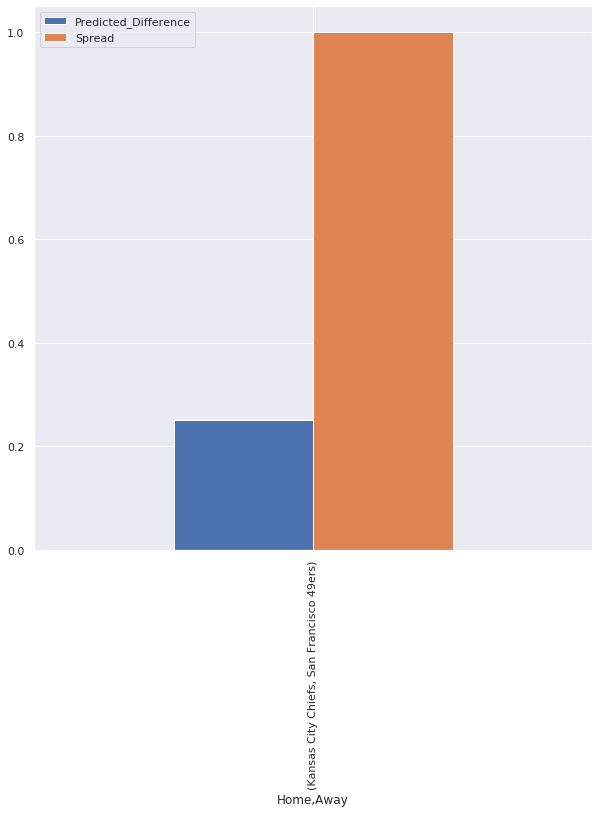

In [0]:
sns.set()  # use Seaborn styles
bar_chart = upcoming_week_predictions.set_index(['Home', 'Away'])[['Predicted_Difference', 'Spread']].plot.bar(figsize=(10,10))

I compare predicted team totals to O/U in a bar chart - anywhere there is a large disparity between predicted total and O/U could be a good game to bet either the Over (if the predicted total blue line is largely above the O/U orange line) or Under (if the predicted total blue line is clearly below the O/U orange line).

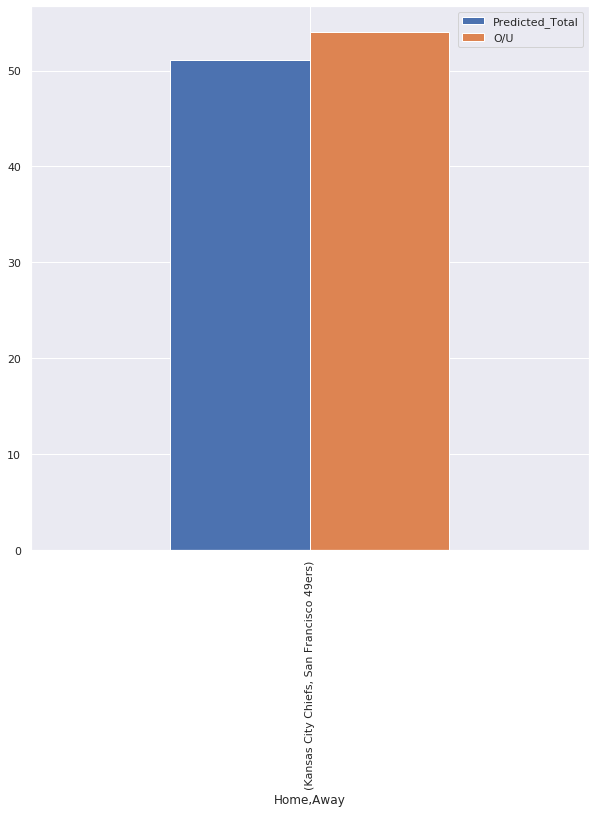

In [0]:
upcoming_week_predictions['O/U'] = pd.to_numeric(upcoming_week_predictions['O/U'])
bar_chart = upcoming_week_predictions.set_index(['Home', 'Away'])[['Predicted_Total', 'O/U']].plot.bar(figsize=(10,10))

FOR WEEK 15 PREDICTIVE BETTING DATA:

**MIGHT BE DIFFERENT INFORMATION IF YOU ARE RUNNING THE NOTEBOOK TO PREDICT GAMES AFTER WEEK 15**

Potential game to bet against the spread:
BAL -15

Potential games to bet the O/U:
DET O47

## 6. Analyze Team Data to Verify Bets

To verify certain bets, it is helpful to look at average team data to confirm the predictive model.

**BELOW I WILL ANALYZE BETTING BAL -15: THIS ANALYSIS WILL NOT APPLY TO WEEKS AFTER 15 (THE CURRENT WEEK I AM ANALYZING)**

To verify BAL -15 where the Baltimore Ravens are playing at home against the New York Jets, I look at how many points BAL scores at home vs away on average, their overall record compared to the NYJ, and how many points they typically score under the kind of stadium they are playing in (in this scenario, at home in a fixed roof).

In [0]:
result_pivot = pd.pivot_table(result, values=['Offense', 'Defense'], index=['team', 'Roof Type'], aggfunc=np.nanmean)
result_pivot.head(60)

Defense    Offense
team                 Roof Type                        
Arizona Cardinals    Fixed        31.000000   9.000000
                     Open         25.285714  24.857143
                     Retractable  29.250000  22.250000
Atlanta Falcons      Fixed        18.500000  19.000000
                     Open         15.666667  28.666667
                     Retractable  28.636364  23.363636
Baltimore Ravens     Open         17.625000  33.187500
Buffalo Bills        Open         16.266667  19.200000
                     Retractable  15.000000  26.000000
Carolina Panthers    Fixed        34.000000  31.000000
                     Open         29.818182  20.818182
                     Retractable  27.000000  20.000000
Chicago Bears        Fixed        19.500000  22.500000
                     Open         18.500000  16.785714
Cincinnati Bengals   Open         26.250000  17.437500
Cleveland Browns     Open         23.666667  20.733333
                     Retractable  38.000000  24.000000
Dallas Cowboys       Fixed        19.500000  22.500000
                     Open         20.666667  22.000000
                     Retractable  19.750000  32.125000
Denver Broncos       Fixed        27.000000  23.000000
                     Open         19.230769  16.000000
                     Retractable  19.500000  25.500000
Detroit Lions        Fixed        28.000000  21.666667
                     Open         24.000000  19.833333
                     Retractable  27.000000  27.000000
Green Bay Packers    Fixed        15.000000  23.000000
                     Open         19.923077  22.769231
                     Retractable  24.000000  34.000000
Houston Texans       Fixed        30.000000  28.000000
                     Open         21.500000  23.000000
                     Retractable  25.111111  23.555556
Indianapolis Colts   Fixed        34.000000   7.000000
                     Open         27.000000  23.500000
                     Retractable  19.666667  23.666667
Jacksonville Jaguars Open         25.153846  20.230769
                     Retractable  23.333333  12.333333
Kansas City Chiefs   Fixed        30.000000  34.000000
                     Open         18.533333  27.800000
Los Angeles Chargers Fixed        13.000000  10.000000
                     Open         22.133333  21.800000
Los Angeles Rams     Open         23.307692  23.230769
                     Retractable  20.333333  30.666667
Miami Dolphins       Open         32.214286  20.285714
                     Retractable  21.500000  11.000000
Minnesota Vikings    Fixed        17.666667  26.333333
                     Open         20.000000  23.666667
                     Retractable  24.000000  28.000000
New England Patriots Open         13.133333  26.533333
                     Retractable  28.000000  22.000000
New Orleans Saints   Fixed        22.875000  28.375000
                     Open         20.000000  29.285714
                     Retractable  18.000000  26.000000
New York Giants      Fixed        31.000000  26.000000
                     Open         27.500000  21.285714
                     Retractable  35.000000  17.000000
New York Jets        Open         22.437500  17.250000
Oakland Raiders      Fixed        34.000000  14.000000
                     Open         25.692308  18.769231
                     Retractable  25.500000  27.500000

Baltimore scores on average 33 points in an open roof, whereas the Jets score 17. — BAL could win by 16 so BAL -15 still looks like a good bet.

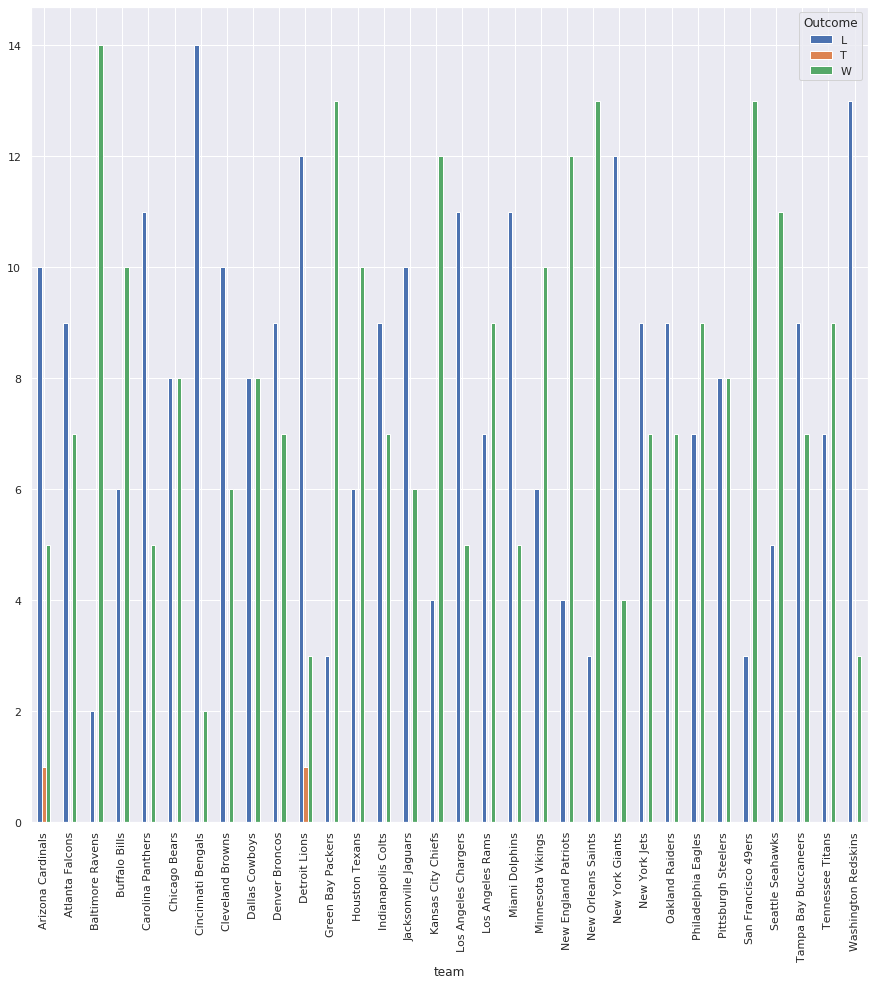

In [0]:
sns.set()  # use Seaborn styles
records = pd.pivot_table(result, values = 'OPP', index='team', columns='Outcome', aggfunc='count')
records.plot.bar(figsize=(15,15))

BAL has won 11 games and the NYJ have won only 5.

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  

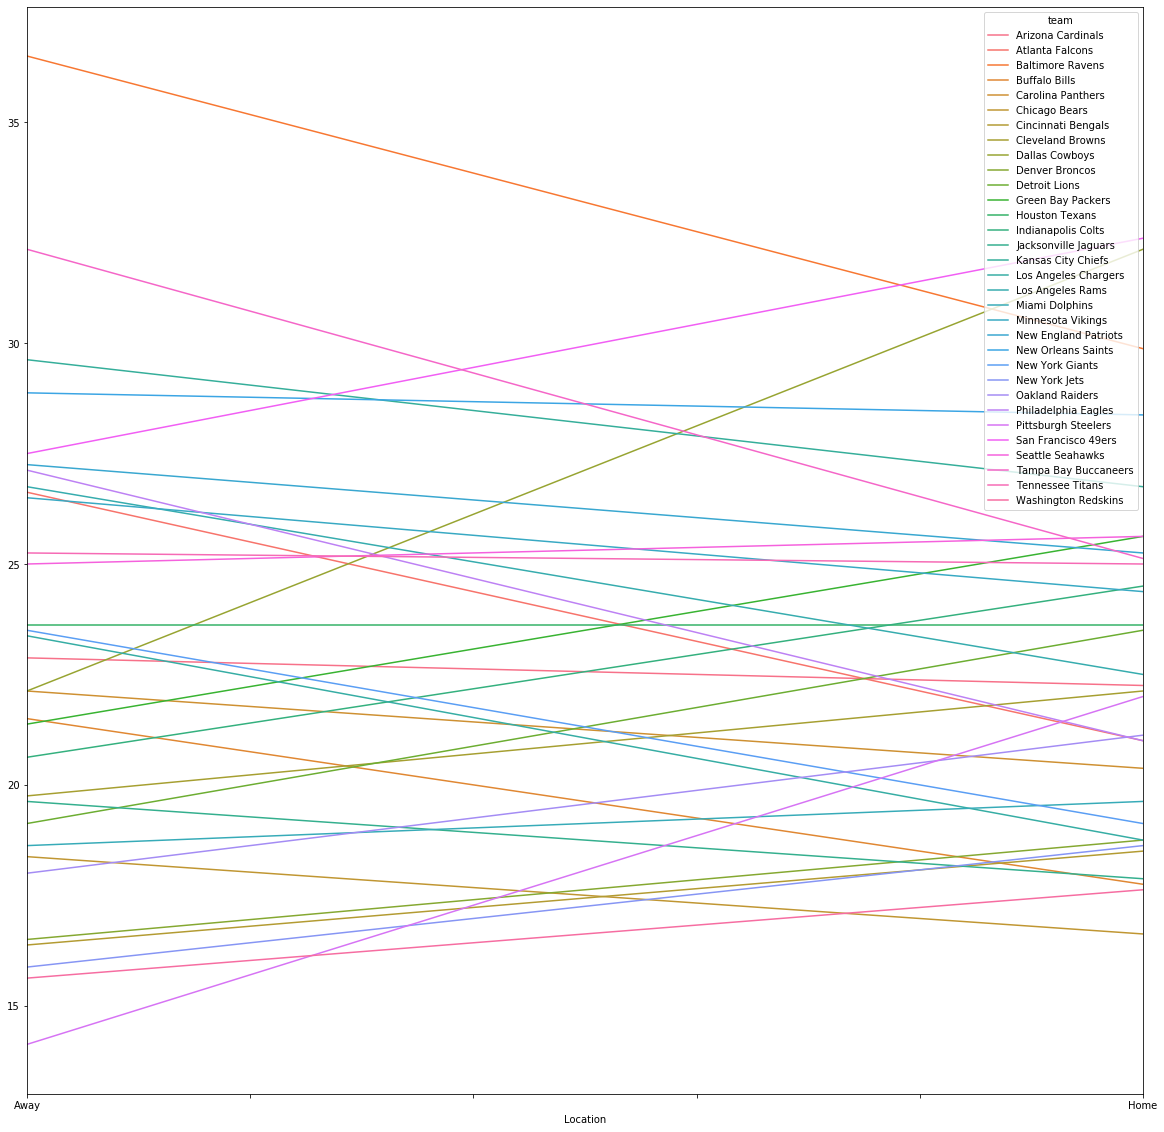

<Figure size 432x288 with 0 Axes>

In [0]:
NUM_COLORS = 32

sns.reset_orig()  # get default matplotlib styles back
clrs = sns.color_palette('husl', n_colors=NUM_COLORS)  # a list of RGB tuples
scores_by_location = result.pivot_table('Offense', index='Location', columns='team', aggfunc='mean').plot(figsize=(20, 20), color=clrs)

plt.show()
plt. savefig('avgScoreByLocation.png')

BAL scores more point away than home but still scores around 29 points at home.

BAL -15 seems like a good bet based on the predictive model, and sports gambling is close to being legalized in Michigan: https://www.actionnetwork.com/news/michigan-legalizes-sports-betting-online?utm_source=Iterable&utm_medium=email&utm_campaign=campaign_925793 

**Author:** Caroline Gilhool, University of Michigan, December 12, 2019